In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
import sklearn.metrics as metrics

import contextily as cx

import folium

In [2]:
age = pd.read_csv('/Users/emilyrumer/Documents/UNI/YEAR 4/GEOG5303M Creative Coding/3 Healthy High Streets/Geodemographic Classifier/Census Data/OA sheets/census2021-ts007a-oa.csv')
sex = pd.read_csv('/Users/emilyrumer/Documents/UNI/YEAR 4/GEOG5303M Creative Coding/3 Healthy High Streets/Geodemographic Classifier/Census Data/OA sheets/census2021-ts008-oa.csv')
ethnicity = pd.read_csv('/Users/emilyrumer/Documents/UNI/YEAR 4/GEOG5303M Creative Coding/3 Healthy High Streets/Geodemographic Classifier/Census Data/OA sheets/census2021-ts021-oa.csv')
householdcomp = pd.read_csv('/Users/emilyrumer/Documents/UNI/YEAR 4/GEOG5303M Creative Coding/3 Healthy High Streets/Geodemographic Classifier/Census Data/OA sheets/census2021-ts003-oa.csv')
economicactivity = pd.read_csv('/Users/emilyrumer/Documents/UNI/YEAR 4/GEOG5303M Creative Coding/3 Healthy High Streets/Geodemographic Classifier/Census Data/OA sheets/census2021-ts066-oa.csv')
education = pd.read_csv('/Users/emilyrumer/Documents/UNI/YEAR 4/GEOG5303M Creative Coding/3 Healthy High Streets/Geodemographic Classifier/Census Data/OA sheets/census2021-ts067-oa.csv')
disability = pd.read_csv('/Users/emilyrumer/Documents/UNI/YEAR 4/GEOG5303M Creative Coding/3 Healthy High Streets/Geodemographic Classifier/Census Data/OA sheets/census2021-ts038-oa.csv')
health = pd.read_csv('/Users/emilyrumer/Documents/UNI/YEAR 4/GEOG5303M Creative Coding/3 Healthy High Streets/Geodemographic Classifier/Census Data/OA sheets/census2021-ts037-oa.csv')

Ethnicity

In [3]:
ethnicityagg = ethnicity.copy()

In [4]:
ethnicityagg.columns

Index(['date', 'geography', 'geography code',
       'Ethnic group: Total: All usual residents',
       'Ethnic group: Asian, Asian British or Asian Welsh',
       'Ethnic group: Asian, Asian British or Asian Welsh: Bangladeshi',
       'Ethnic group: Asian, Asian British or Asian Welsh: Chinese',
       'Ethnic group: Asian, Asian British or Asian Welsh: Indian',
       'Ethnic group: Asian, Asian British or Asian Welsh: Pakistani',
       'Ethnic group: Asian, Asian British or Asian Welsh: Other Asian',
       'Ethnic group: Black, Black British, Black Welsh, Caribbean or African',
       'Ethnic group: Black, Black British, Black Welsh, Caribbean or African: African',
       'Ethnic group: Black, Black British, Black Welsh, Caribbean or African: Caribbean',
       'Ethnic group: Black, Black British, Black Welsh, Caribbean or African: Other Black',
       'Ethnic group: Mixed or Multiple ethnic groups',
       'Ethnic group: Mixed or Multiple ethnic groups: White and Asian',
       

In [5]:
ethnicityagg = ethnicityagg[['geography', 'geography code', 'Ethnic group: Total: All usual residents', 'Ethnic group: Asian, Asian British or Asian Welsh',
                          'Ethnic group: Black, Black British, Black Welsh, Caribbean or African',
                          'Ethnic group: Mixed or Multiple ethnic groups', 'Ethnic group: White', 'Ethnic group: Other ethnic group']]

ethnicityagg.head()

geography geography code  Ethnic group: Total: All usual residents  \
0  E00000001      E00000001                                       176   
1  E00000003      E00000003                                       255   
2  E00000005      E00000005                                       112   
3  E00000007      E00000007                                       144   
4  E00000010      E00000010                                       175   

   Ethnic group: Asian, Asian British or Asian Welsh  \
0                                                  5   
1                                                 24   
2                                                 13   
3                                                 24   
4                                                 10   

   Ethnic group: Black, Black British, Black Welsh, Caribbean or African  \
0                                                  3                       
1                                                  5                       
2                                                  0                       
3                                                  2                       
4                                                 12                       

   Ethnic group: Mixed or Multiple ethnic groups  Ethnic group: White  \
0                                              6                  155   
1                                             13                  209   
2                                              6                   85   
3                                              4                  106   
4                                             22                  120   

   Ethnic group: Other ethnic group  
0                                 7  
1                                 4  
2                                 8  
3                                 8  
4                                11

In [6]:
#Calculating percentages for ethnicity groups
ethnicityagg.loc[:, 'Asian %'] = (ethnicityagg['Ethnic group: Asian, Asian British or Asian Welsh'] / ethnicityagg['Ethnic group: Total: All usual residents']) *100
ethnicityagg.loc[:, 'Black %'] = (ethnicityagg['Ethnic group: Black, Black British, Black Welsh, Caribbean or African'] / ethnicityagg['Ethnic group: Total: All usual residents'])*100
ethnicityagg.loc[:, 'Mixed %'] = (ethnicityagg['Ethnic group: Mixed or Multiple ethnic groups'] / ethnicityagg['Ethnic group: Total: All usual residents'])*100
ethnicityagg.loc[:, 'White %'] = (ethnicityagg['Ethnic group: White'] / ethnicityagg['Ethnic group: Total: All usual residents'])*100
ethnicityagg.loc[:, 'Other %'] = (ethnicityagg['Ethnic group: Other ethnic group'] / ethnicityagg['Ethnic group: Total: All usual residents'])*100

In [7]:
ethnicityagg = ethnicityagg.drop(columns=['geography', 'Ethnic group: Total: All usual residents', 'Ethnic group: Asian, Asian British or Asian Welsh',
                          'Ethnic group: Black, Black British, Black Welsh, Caribbean or African',
                          'Ethnic group: Mixed or Multiple ethnic groups', 'Ethnic group: White', 'Ethnic group: Other ethnic group'])
ethnicityagg.head()

geography code    Asian %   Black %    Mixed %    White %   Other %
0      E00000001   2.840909  1.704545   3.409091  88.068182  3.977273
1      E00000003   9.411765  1.960784   5.098039  81.960784  1.568627
2      E00000005  11.607143  0.000000   5.357143  75.892857  7.142857
3      E00000007  16.666667  1.388889   2.777778  73.611111  5.555556
4      E00000010   5.714286  6.857143  12.571429  68.571429  6.285714

Disability

In [8]:
disabilityagg = disability.copy()

In [9]:
disabilityagg.columns

Index(['date', 'geography', 'geography code',
       'Disability: Total: All usual residents',
       'Disability: Disabled under the Equality Act',
       'Disability: Disabled under the Equality Act: Day-to-day activities limited a lot',
       'Disability: Disabled under the Equality Act: Day-to-day activities limited a little',
       'Disability: Not disabled under the Equality Act',
       'Disability: Not disabled under the Equality Act: Has long term physical or mental health condition but day-to-day activities are not limited',
       'Disability: Not disabled under the Equality Act: No long term physical or mental health conditions'],
      dtype='object')

In [10]:
disabilityagg = disabilityagg[['geography', 'geography code',
                               'Disability: Total: All usual residents',
                               'Disability: Disabled under the Equality Act',
                               'Disability: Not disabled under the Equality Act']]

disabilityagg.head()

geography geography code  Disability: Total: All usual residents  \
0  E00000001      E00000001                                     174   
1  E00000003      E00000003                                     256   
2  E00000005      E00000005                                     112   
3  E00000007      E00000007                                     144   
4  E00000010      E00000010                                     178   

   Disability: Disabled under the Equality Act  \
0                                           19   
1                                           33   
2                                           14   
3                                           11   
4                                           36   

   Disability: Not disabled under the Equality Act  
0                                              155  
1                                              223  
2                                               98  
3                                              133  
4                                              142

In [11]:
#Calculating percentages for disability groups
disabilityagg.loc[:, 'Disabled %'] = (disabilityagg['Disability: Disabled under the Equality Act'] / disabilityagg['Disability: Total: All usual residents']) *100
disabilityagg.loc[:, 'Not Disabled %'] = (disabilityagg['Disability: Not disabled under the Equality Act'] / disabilityagg['Disability: Total: All usual residents'])*100

In [12]:
disabilityagg = disabilityagg.drop(columns=['geography', 'Disability: Total: All usual residents', 'Disability: Total: All usual residents',
                               'Disability: Disabled under the Equality Act',
                               'Disability: Not disabled under the Equality Act'])
disabilityagg.head()

geography code  Disabled %  Not Disabled %
0      E00000001   10.919540       89.080460
1      E00000003   12.890625       87.109375
2      E00000005   12.500000       87.500000
3      E00000007    7.638889       92.361111
4      E00000010   20.224719       79.775281

Age

In [13]:
ageagg = age.copy()

In [14]:
ageagg.columns

Index(['date', 'geography', 'geography code', 'Age: Total',
       'Age: Aged 4 years and under', 'Age: Aged 5 to 9 years',
       'Age: Aged 10 to 14 years', 'Age: Aged 15 to 19 years',
       'Age: Aged 20 to 24 years', 'Age: Aged 25 to 29 years',
       'Age: Aged 30 to 34 years', 'Age: Aged 35 to 39 years',
       'Age: Aged 40 to 44 years', 'Age: Aged 45 to 49 years',
       'Age: Aged 50 to 54 years', 'Age: Aged 55 to 59 years',
       'Age: Aged 60 to 64 years', 'Age: Aged 65 to 69 years',
       'Age: Aged 70 to 74 years', 'Age: Aged 75 to 79 years',
       'Age: Aged 80 to 84 years', 'Age: Aged 85 years and over'],
      dtype='object')

In [15]:
#Aggregating age into broader groups
ageagg['Aged 4 and under'] = ageagg['Age: Aged 4 years and under']
ageagg['Aged 5-9'] = ageagg['Age: Aged 5 to 9 years']
ageagg['Aged 10-19'] = ageagg[['Age: Aged 10 to 14 years', 'Age: Aged 15 to 19 years']].sum(axis=1)
ageagg['Aged 20-24'] = ageagg['Age: Aged 20 to 24 years']
ageagg['Aged 25-64'] = ageagg[['Age: Aged 25 to 29 years', 'Age: Aged 30 to 34 years', 'Age: Aged 35 to 39 years',
                               'Age: Aged 40 to 44 years', 'Age: Aged 45 to 49 years', 'Age: Aged 50 to 54 years',
                               'Age: Aged 55 to 59 years', 'Age: Aged 60 to 64 years']].sum(axis=1)
ageagg['Aged 65-84'] = ageagg[['Age: Aged 65 to 69 years', 'Age: Aged 70 to 74 years', 'Age: Aged 75 to 79 years',
                               'Age: Aged 80 to 84 years']].sum(axis=1)
ageagg['Aged 85+'] = ageagg['Age: Aged 85 years and over']

In [16]:
ageagg.columns

Index(['date', 'geography', 'geography code', 'Age: Total',
       'Age: Aged 4 years and under', 'Age: Aged 5 to 9 years',
       'Age: Aged 10 to 14 years', 'Age: Aged 15 to 19 years',
       'Age: Aged 20 to 24 years', 'Age: Aged 25 to 29 years',
       'Age: Aged 30 to 34 years', 'Age: Aged 35 to 39 years',
       'Age: Aged 40 to 44 years', 'Age: Aged 45 to 49 years',
       'Age: Aged 50 to 54 years', 'Age: Aged 55 to 59 years',
       'Age: Aged 60 to 64 years', 'Age: Aged 65 to 69 years',
       'Age: Aged 70 to 74 years', 'Age: Aged 75 to 79 years',
       'Age: Aged 80 to 84 years', 'Age: Aged 85 years and over',
       'Aged 4 and under', 'Aged 5-9', 'Aged 10-19', 'Aged 20-24',
       'Aged 25-64', 'Aged 65-84', 'Aged 85+'],
      dtype='object')

In [17]:
ageagg = ageagg.drop(columns=['date', 'geography', 'Age: Aged 4 years and under', 'Age: Aged 5 to 9 years',
       'Age: Aged 10 to 14 years', 'Age: Aged 15 to 19 years',
       'Age: Aged 20 to 24 years', 'Age: Aged 25 to 29 years',
       'Age: Aged 30 to 34 years', 'Age: Aged 35 to 39 years',
       'Age: Aged 40 to 44 years', 'Age: Aged 45 to 49 years',
       'Age: Aged 50 to 54 years', 'Age: Aged 55 to 59 years',
       'Age: Aged 60 to 64 years', 'Age: Aged 65 to 69 years',
       'Age: Aged 70 to 74 years', 'Age: Aged 75 to 79 years',
       'Age: Aged 80 to 84 years', 'Age: Aged 85 years and over'])
ageagg.head()

geography code  Age: Total  Aged 4 and under  Aged 5-9  Aged 10-19  \
0      E00000001         177                 1         5          12   
1      E00000003         259                10         8          27   
2      E00000005         111                 4         1           3   
3      E00000007         147                 1         2           2   
4      E00000010         179                 1         3           7   

   Aged 20-24  Aged 25-64  Aged 65-84  Aged 85+  
0           3          89          65         2  
1          12         126          70         6  
2           7          68          26         2  
3          17         108          13         4  
4           9         138          20         1

In [18]:
#Calculating percetages for the population in each aggregated age groups
ageagg.loc[:, 'Aged 4 and under %'] = (ageagg['Aged 4 and under'] / ageagg['Age: Total']) *100
ageagg.loc[:, 'Aged 5-9 %'] = (ageagg['Aged 5-9'] / ageagg['Age: Total']) *100
ageagg.loc[:, 'Aged 10-19 %'] = (ageagg['Aged 10-19'] / ageagg['Age: Total']) *100
ageagg.loc[:, 'Aged 20-24 %'] = (ageagg['Aged 20-24'] / ageagg['Age: Total']) *100
ageagg.loc[:, 'Aged 25-64 %'] = (ageagg['Aged 25-64'] / ageagg['Age: Total']) *100
ageagg.loc[:, 'Aged 65-84 %'] = (ageagg['Aged 65-84'] / ageagg['Age: Total']) *100
ageagg.loc[:, 'Aged 85+ %'] = (ageagg['Aged 85+'] / ageagg['Age: Total']) *100

In [19]:
ageagg.columns

Index(['geography code', 'Age: Total', 'Aged 4 and under', 'Aged 5-9',
       'Aged 10-19', 'Aged 20-24', 'Aged 25-64', 'Aged 65-84', 'Aged 85+',
       'Aged 4 and under %', 'Aged 5-9 %', 'Aged 10-19 %', 'Aged 20-24 %',
       'Aged 25-64 %', 'Aged 65-84 %', 'Aged 85+ %'],
      dtype='object')

In [20]:
ageagg = ageagg.drop(columns=['Age: Total', 'Aged 4 and under', 'Aged 5-9', 'Aged 10-19',
                              'Aged 20-24', 'Aged 25-64', 'Aged 65-84', 'Aged 85+'])
ageagg.head()

geography code  Aged 4 and under %  Aged 5-9 %  Aged 10-19 %  Aged 20-24 %  \
0      E00000001            0.564972    2.824859      6.779661      1.694915   
1      E00000003            3.861004    3.088803     10.424710      4.633205   
2      E00000005            3.603604    0.900901      2.702703      6.306306   
3      E00000007            0.680272    1.360544      1.360544     11.564626   
4      E00000010            0.558659    1.675978      3.910615      5.027933   

   Aged 25-64 %  Aged 65-84 %  Aged 85+ %  
0     50.282486     36.723164    1.129944  
1     48.648649     27.027027    2.316602  
2     61.261261     23.423423    1.801802  
3     73.469388      8.843537    2.721088  
4     77.094972     11.173184    0.558659

Economic Activity

In [21]:
economicactivity.columns

Index(['date', 'geography', 'geography code',
       'Economic activity status: Total: All usual residents aged 16 years and over',
       'Economic activity status: Economically active (excluding full-time students)',
       'Economic activity status: Economically active (excluding full-time students):In employment',
       'Economic activity status: Economically active (excluding full-time students):In employment:Employee',
       'Economic activity status: Economically active (excluding full-time students): In employment: Employee: Part-time',
       'Economic activity status: Economically active (excluding full-time students): In employment: Employee: Full-time',
       'Economic activity status: Economically active (excluding full-time students):In employment:Self-employed with employees',
       'Economic activity status: Economically active (excluding full-time students): In employment: Self-employed with employees: Part-time',
       'Economic activity status: Economically acti

In [22]:
ecactagg = economicactivity.copy()

In [23]:
#Aggregating ecnonomic activity groups into smaller number of columns
ecactagg['Economically active: In employment (excl students)'] = ecactagg['Economic activity status: Economically active (excluding full-time students):In employment']
ecactagg['Economically active: Unemployed (excl students)'] = ecactagg['Economic activity status: Economically active (excluding full-time students): Unemployed']


ecactagg['Economically active: In employment (incl students)'] = ecactagg['Economic activity status: Economically active and a full-time student:In employment']
ecactagg['Economically active: Unemployed (incl students)'] = ecactagg['Economic activity status: Economically active and a full-time student: Unemployed']

ecactagg['Economically inactive: Retired'] = ecactagg['Economic activity status: Economically inactive: Retired']
ecactagg['Economically inactive: Student'] = ecactagg['Economic activity status: Economically inactive: Student']
ecactagg['Economically inactive: Looking after home or family'] = ecactagg['Economic activity status: Economically inactive: Looking after home or family']
ecactagg['Economically inactive: Long-term sick or disabled'] = ecactagg['Economic activity status: Economically inactive: Long-term sick or disabled']
ecactagg['Economically inactive: Other'] = ecactagg['Economic activity status: Economically inactive: Other']



In [24]:
ecactagg = ecactagg.drop(columns=['date', 'geography',
       'Economic activity status: Economically active (excluding full-time students)',
       'Economic activity status: Economically active (excluding full-time students):In employment',
       'Economic activity status: Economically active (excluding full-time students):In employment:Employee',
       'Economic activity status: Economically active (excluding full-time students): In employment: Employee: Part-time',
       'Economic activity status: Economically active (excluding full-time students): In employment: Employee: Full-time',
       'Economic activity status: Economically active (excluding full-time students):In employment:Self-employed with employees',
       'Economic activity status: Economically active (excluding full-time students): In employment: Self-employed with employees: Part-time',
       'Economic activity status: Economically active (excluding full-time students): In employment: Self-employed with employees: Full-time',
       'Economic activity status: Economically active (excluding full-time students):In employment:Self-employed without employees',
       'Economic activity status: Economically active (excluding full-time students): In employment: Self-employed without employees: Part-time',
       'Economic activity status: Economically active (excluding full-time students): In employment: Self-employed without employees: Full-time',
       'Economic activity status: Economically active (excluding full-time students): Unemployed',
       'Economic activity status: Economically active and a full-time student',
       'Economic activity status: Economically active and a full-time student:In employment',
       'Economic activity status: Economically active and a full-time student:In employment:Employee',
       'Economic activity status: Economically active and a full-time student: In employment: Employee: Part-time',
       'Economic activity status: Economically active and a full-time student: In employment: Employee: Full-time',
       'Economic activity status: Economically active and a full-time student:In employment:Self-employed with employees',
       'Economic activity status: Economically active and a full-time student: In employment: Self-employed with employees: Part-time',
       'Economic activity status: Economically active and a full-time student: In employment: Self-employed with employees: Full-time',
       'Economic activity status: Economically active and a full-time student:In employment:Self-employed without employees',
       'Economic activity status: Economically active and a full-time student: In employment: Self-employed without employees: Part-time',
       'Economic activity status: Economically active and a full-time student: In employment: Self-employed without employees: Full-time',
       'Economic activity status: Economically active and a full-time student: Unemployed',
       'Economic activity status: Economically inactive',
       'Economic activity status: Economically inactive: Retired',
       'Economic activity status: Economically inactive: Student',
       'Economic activity status: Economically inactive: Looking after home or family',
       'Economic activity status: Economically inactive: Long-term sick or disabled',
       'Economic activity status: Economically inactive: Other'])


In [25]:
#Calculating percentages for economic activity groups
ecactagg.loc[:, 'Economically active: In employment (excl students) %'] = (ecactagg['Economically active: In employment (excl students)'] / ecactagg['Economic activity status: Total: All usual residents aged 16 years and over']) *100
ecactagg.loc[:, 'Economically active: Unemployed (excl students) %'] = (ecactagg['Economically active: Unemployed (excl students)'] / ecactagg['Economic activity status: Total: All usual residents aged 16 years and over']) *100
ecactagg.loc[:, 'Economically active: In employment (incl students) %'] = (ecactagg['Economically active: In employment (incl students)'] / ecactagg['Economic activity status: Total: All usual residents aged 16 years and over']) *100
ecactagg.loc[:, 'Economically active: Unemployed (incl students) %'] = (ecactagg['Economically active: Unemployed (incl students)'] / ecactagg['Economic activity status: Total: All usual residents aged 16 years and over']) *100
ecactagg.loc[:, 'Economically inactive: Retired %'] = (ecactagg['Economically inactive: Retired'] / ecactagg['Economic activity status: Total: All usual residents aged 16 years and over']) *100
ecactagg.loc[:, 'Economically inactive: Student %'] = (ecactagg['Economically inactive: Student'] / ecactagg['Economic activity status: Total: All usual residents aged 16 years and over']) *100
ecactagg.loc[:, 'Economically inactive: Looking after home or family %'] = (ecactagg['Economically inactive: Looking after home or family'] / ecactagg['Economic activity status: Total: All usual residents aged 16 years and over']) *100
ecactagg.loc[:, 'Economically inactive: Long-term sick or disabled %'] = (ecactagg['Economically inactive: Long-term sick or disabled'] / ecactagg['Economic activity status: Total: All usual residents aged 16 years and over']) *100
ecactagg.loc[:, 'Economically inactive: Other %'] = (ecactagg['Economically inactive: Other'] / ecactagg['Economic activity status: Total: All usual residents aged 16 years and over']) *100

In [26]:
ecactagg = ecactagg.drop(columns=['Economic activity status: Total: All usual residents aged 16 years and over',
       'Economically active: In employment (excl students)',
       'Economically active: Unemployed (excl students)',
       'Economically active: In employment (incl students)',
       'Economically active: Unemployed (incl students)',
       'Economically inactive: Retired', 'Economically inactive: Student',
       'Economically inactive: Looking after home or family',
       'Economically inactive: Long-term sick or disabled',
       'Economically inactive: Other'])
ecactagg.head(1)

geography code  Economically active: In employment (excl students) %  \
0      E00000001                                          54.658385      

   Economically active: Unemployed (excl students) %  \
0                                            6.21118   

   Economically active: In employment (incl students) %  \
0                                                0.0      

   Economically active: Unemployed (incl students) %  \
0                                                0.0   

   Economically inactive: Retired %  Economically inactive: Student %  \
0                         32.298137                           3.10559   

   Economically inactive: Looking after home or family %  \
0                                           1.242236       

   Economically inactive: Long-term sick or disabled %  \
0                                           0.621118     

   Economically inactive: Other %  
0                        1.863354

Sex

In [27]:
sexagg = sex.copy()

In [28]:
sexagg.columns

Index(['date', 'geography', 'geography code',
       'Sex: All persons; measures: Value', 'Sex: Female; measures: Value',
       'Sex: Male; measures: Value'],
      dtype='object')

In [29]:
sexagg = sexagg[['geography', 'geography code',
                 'Sex: All persons; measures: Value', 'Sex: Female; measures: Value',
                 'Sex: Male; measures: Value']]

sexagg.head()

geography geography code  Sex: All persons; measures: Value  \
0  E00060274      E00060274                                273   
1  E00060275      E00060275                                415   
2  E00060276      E00060276                                259   
3  E00060277      E00060277                                278   
4  E00060279      E00060279                                276   

   Sex: Female; measures: Value  Sex: Male; measures: Value  
0                           143                         130  
1                           219                         196  
2                           139                         120  
3                           147                         131  
4                           140                         136

In [30]:
sexagg.loc[:, 'Female %'] = (sexagg['Sex: Female; measures: Value'] / sexagg['Sex: All persons; measures: Value'])*100
sexagg.loc[:, 'Male %'] = (sexagg['Sex: Male; measures: Value'] / sexagg['Sex: All persons; measures: Value'])*100

In [31]:
sexagg.columns

Index(['geography', 'geography code', 'Sex: All persons; measures: Value',
       'Sex: Female; measures: Value', 'Sex: Male; measures: Value',
       'Female %', 'Male %'],
      dtype='object')

In [32]:
sexagg = sexagg.drop(columns=['geography', 'Sex: All persons; measures: Value',
       'Sex: Female; measures: Value', 'Sex: Male; measures: Value'])
sexagg.head()

geography code   Female %     Male %
0      E00060274  52.380952  47.619048
1      E00060275  52.771084  47.228916
2      E00060276  53.667954  46.332046
3      E00060277  52.877698  47.122302
4      E00060279  50.724638  49.275362

Household Composition

In [33]:
householdcomp.columns

Index(['date', 'geography', 'geography code',
       'Household composition: Total; measures: Value',
       'Household composition: One person household; measures: Value',
       'Household composition: One person household: Aged 66 years and over; measures: Value',
       'Household composition: One person household: Other; measures: Value',
       'Household composition: Single family household; measures: Value',
       'Household composition: Single family household: All aged 66 years and over; measures: Value',
       'Household composition: Single family household: Married or civil partnership couple; measures: Value',
       'Household composition: Single family household: Married or civil partnership couple: No children; measures: Value',
       'Household composition: Single family household: Married or civil partnership couple: Dependent children; measures: Value',
       'Household composition: Single family household: Married or civil partnership couple: All children non-de

In [34]:
householdcompagg = householdcomp.copy()

In [35]:
#aggregating household composition groups into smaller number of categories
householdcompagg['Household Comp: One person'] = householdcompagg['Household composition: One person household; measures: Value']

householdcompagg['Household Comp: Single family: Over 66'] = householdcompagg['Household composition: Single family household: All aged 66 years and over; measures: Value']

householdcompagg['Household Comp: Single family: Married or civil partnership: No Children'] = householdcompagg['Household composition: Single family household: Married or civil partnership couple: No children; measures: Value']
householdcompagg['Household Comp: Single family: Married or civil partnership: Dependent Children'] = householdcompagg['Household composition: Single family household: Married or civil partnership couple: Dependent children; measures: Value']
householdcompagg['Household Comp: Single family: Married or civil partnership: Non-dependent Children'] = householdcompagg['Household composition: Single family household: Married or civil partnership couple: All children non-dependent; measures: Value']

householdcompagg['Household Comp: Single family: Cohabiting couple family: No Children'] = householdcompagg['Household composition: Single family household: Cohabiting couple family: No children; measures: Value']
householdcompagg['Household Comp: Single family: Cohabiting couple family: Dependent Children'] = householdcompagg['Household composition: Single family household: Cohabiting couple family: With dependent children; measures: Value']
householdcompagg['Household Comp: Single family: Cohabiting couple family: Non-dependent Children'] = householdcompagg['Household composition: Single family household: Cohabiting couple family: All children non-dependent; measures: Value']

householdcompagg['Household Comp: Single family: Lone parent family: Dependent Children'] = householdcompagg['Household composition: Single family household: Lone parent family: With dependent children; measures: Value']
householdcompagg['Household Comp: Single family: Lone parent family: Non-dependent Children'] = householdcompagg['Household composition: Single family household: Lone parent family: All children non-dependent; measures: Value']

householdcompagg['Household Comp: Single family: Other composition'] = householdcompagg['Household composition: Single family household: Other single family household: Other family composition; measures: Value']


householdcompagg['Household Comp: Other household types: Dependent Children'] = householdcompagg['Household composition: Other household types: With dependent children; measures: Value']
householdcompagg['Household Comp: Other household types: FT Students & All over 66'] = householdcompagg['Household composition: Other household types: Other, including all full-time students and all aged 66 years and over; measures: Value']


In [36]:
householdcompagg = householdcompagg.drop(columns=['date', 'geography', 'Household composition: One person household; measures: Value',
       'Household composition: One person household: Aged 66 years and over; measures: Value',
       'Household composition: One person household: Other; measures: Value',
       'Household composition: Single family household; measures: Value',
       'Household composition: Single family household: All aged 66 years and over; measures: Value',
       'Household composition: Single family household: Married or civil partnership couple; measures: Value',
       'Household composition: Single family household: Married or civil partnership couple: No children; measures: Value',
       'Household composition: Single family household: Married or civil partnership couple: Dependent children; measures: Value',
       'Household composition: Single family household: Married or civil partnership couple: All children non-dependent; measures: Value',
       'Household composition: Single family household: Cohabiting couple family; measures: Value',
       'Household composition: Single family household: Cohabiting couple family: No children; measures: Value',
       'Household composition: Single family household: Cohabiting couple family: With dependent children; measures: Value',
       'Household composition: Single family household: Cohabiting couple family: All children non-dependent; measures: Value',
       'Household composition: Single family household: Lone parent family; measures: Value',
       'Household composition: Single family household: Lone parent family: With dependent children; measures: Value',
       'Household composition: Single family household: Lone parent family: All children non-dependent; measures: Value',
       'Household composition: Single family household: Other single family household; measures: Value',
       'Household composition: Single family household: Other single family household: Other family composition; measures: Value',
       'Household composition: Other household types; measures: Value',
       'Household composition: Other household types: With dependent children; measures: Value',
       'Household composition: Other household types: Other, including all full-time students and all aged 66 years and over; measures: Value'])

In [37]:
householdcompagg.columns

Index(['geography code', 'Household composition: Total; measures: Value',
       'Household Comp: One person', 'Household Comp: Single family: Over 66',
       'Household Comp: Single family: Married or civil partnership: No Children',
       'Household Comp: Single family: Married or civil partnership: Dependent Children',
       'Household Comp: Single family: Married or civil partnership: Non-dependent Children',
       'Household Comp: Single family: Cohabiting couple family: No Children',
       'Household Comp: Single family: Cohabiting couple family: Dependent Children',
       'Household Comp: Single family: Cohabiting couple family: Non-dependent Children',
       'Household Comp: Single family: Lone parent family: Dependent Children',
       'Household Comp: Single family: Lone parent family: Non-dependent Children',
       'Household Comp: Single family: Other composition',
       'Household Comp: Other household types: Dependent Children',
       'Household Comp: Other hous

In [38]:
#Calculating percentages for household composition in new fewer categories
householdcompagg.loc[:, 'Household Comp: One person %'] = (householdcompagg['Household Comp: One person'] / householdcompagg['Household composition: Total; measures: Value']) *100
householdcompagg.loc[:, 'Household Comp: Single family: Over 66 %'] = (householdcompagg['Household Comp: Single family: Over 66'] / householdcompagg['Household composition: Total; measures: Value']) *100

householdcompagg.loc[:, 'Household Comp: Single family: Married or civil partnership: No Children %'] = (householdcompagg['Household Comp: Single family: Married or civil partnership: No Children'] / householdcompagg['Household composition: Total; measures: Value']) *100
householdcompagg.loc[:, 'Household Comp: Single family: Married or civil partnership: Dependent Children %'] = (householdcompagg['Household Comp: Single family: Married or civil partnership: Dependent Children'] / householdcompagg['Household composition: Total; measures: Value']) *100
householdcompagg.loc[:, 'Household Comp: Single family: Married or civil partnership: Non-dependent Children %'] = (householdcompagg['Household Comp: Single family: Married or civil partnership: Non-dependent Children'] / householdcompagg['Household composition: Total; measures: Value']) *100

householdcompagg.loc[:, 'Household Comp: Single family: Cohabiting couple family: No Children %'] = (householdcompagg['Household Comp: Single family: Cohabiting couple family: No Children'] / householdcompagg['Household composition: Total; measures: Value']) *100
householdcompagg.loc[:, 'Household Comp: Single family: Cohabiting couple family: Dependent Children %'] = (householdcompagg['Household Comp: Single family: Cohabiting couple family: Dependent Children'] / householdcompagg['Household composition: Total; measures: Value']) *100
householdcompagg.loc[:, 'Household Comp: Single family: Cohabiting couple family: Non-dependent Children %'] = (householdcompagg['Household Comp: Single family: Cohabiting couple family: Non-dependent Children'] / householdcompagg['Household composition: Total; measures: Value']) *100

householdcompagg.loc[:, 'Household Comp: Single family: Lone parent family: Dependent Children %'] = (householdcompagg['Household Comp: Single family: Lone parent family: Dependent Children'] / householdcompagg['Household composition: Total; measures: Value']) *100
householdcompagg.loc[:, 'Household Comp: Single family: Lone parent family: Non-dependent Children %'] = (householdcompagg['Household Comp: Single family: Lone parent family: Non-dependent Children'] / householdcompagg['Household composition: Total; measures: Value']) *100

householdcompagg.loc[:, 'Household Comp: Single family: Other composition %'] = (householdcompagg['Household Comp: Single family: Other composition'] / householdcompagg['Household composition: Total; measures: Value']) *100

householdcompagg.loc[:, 'Household Comp: Other household types: Dependent Children %'] = (householdcompagg['Household Comp: Other household types: Dependent Children'] / householdcompagg['Household composition: Total; measures: Value']) *100
householdcompagg.loc[:, 'Household Comp: Other household types: FT Students & All over 66 %'] = (householdcompagg['Household Comp: Other household types: FT Students & All over 66'] / householdcompagg['Household composition: Total; measures: Value']) *100

In [39]:
householdcompagg = householdcompagg.drop(columns=['Household composition: Total; measures: Value',
       'Household Comp: One person', 'Household Comp: Single family: Over 66',
       'Household Comp: Single family: Married or civil partnership: No Children',
       'Household Comp: Single family: Married or civil partnership: Dependent Children',
       'Household Comp: Single family: Married or civil partnership: Non-dependent Children',
       'Household Comp: Single family: Cohabiting couple family: No Children',
       'Household Comp: Single family: Cohabiting couple family: Dependent Children',
       'Household Comp: Single family: Cohabiting couple family: Non-dependent Children',
       'Household Comp: Single family: Lone parent family: Dependent Children',
       'Household Comp: Single family: Lone parent family: Non-dependent Children',
       'Household Comp: Single family: Other composition',
       'Household Comp: Other household types: Dependent Children',
       'Household Comp: Other household types: FT Students & All over 66'])

Education

In [40]:
educationagg = education.copy()

In [41]:
educationagg.columns

Index(['date', 'geography', 'geography code',
       'Highest level of qualification: Total: All usual residents aged 16 years and over',
       'Highest level of qualification: No qualifications',
       'Highest level of qualification: Level 1 and entry level qualifications',
       'Highest level of qualification: Level 2 qualifications',
       'Highest level of qualification: Apprenticeship',
       'Highest level of qualification: Level 3 qualifications',
       'Highest level of qualification: Level 4 qualifications and above',
       'Highest level of qualification: Other qualifications'],
      dtype='object')

In [42]:
#Calculating percentages for education in new fewer categories
educationagg.loc[:, 'Highest qualification: No qualifications %'] = (educationagg['Highest level of qualification: No qualifications'] / educationagg['Highest level of qualification: Total: All usual residents aged 16 years and over']) *100
educationagg.loc[:, 'Highest qualification: L1 and entry level %'] = (educationagg['Highest level of qualification: Level 1 and entry level qualifications'] / educationagg['Highest level of qualification: Total: All usual residents aged 16 years and over']) *100
educationagg.loc[:, 'Highest qualification: L2 qualifications %'] = (educationagg['Highest level of qualification: Level 2 qualifications'] / educationagg['Highest level of qualification: Total: All usual residents aged 16 years and over']) *100
educationagg.loc[:, 'Highest qualification: Apprenticeship %'] = (educationagg['Highest level of qualification: Apprenticeship'] / educationagg['Highest level of qualification: Total: All usual residents aged 16 years and over']) *100
educationagg.loc[:, 'Highest qualification: L3 qualifications %'] = (educationagg['Highest level of qualification: Level 3 qualifications'] / educationagg['Highest level of qualification: Total: All usual residents aged 16 years and over']) *100
educationagg.loc[:, 'Highest qualification: L4 qualifications and above %'] = (educationagg['Highest level of qualification: Level 4 qualifications and above'] / educationagg['Highest level of qualification: Total: All usual residents aged 16 years and over']) *100
educationagg.loc[:, 'Highest qualification: Other qualifications %'] = (educationagg['Highest level of qualification: Other qualifications'] / educationagg['Highest level of qualification: Total: All usual residents aged 16 years and over']) *100


In [43]:
educationagg = educationagg.drop(columns=['date', 'geography', 'Highest level of qualification: Total: All usual residents aged 16 years and over',
       'Highest level of qualification: No qualifications',
       'Highest level of qualification: Level 1 and entry level qualifications',
       'Highest level of qualification: Level 2 qualifications',
       'Highest level of qualification: Apprenticeship',
       'Highest level of qualification: Level 3 qualifications',
       'Highest level of qualification: Level 4 qualifications and above',
       'Highest level of qualification: Other qualifications'])
educationagg.head(2)

geography code  Highest qualification: No qualifications %  \
0      E00000001                                    2.500000   
1      E00000003                                    2.262443   

   Highest qualification: L1 and entry level %  \
0                                     4.375000   
1                                     1.357466   

   Highest qualification: L2 qualifications %  \
0                                     6.25000   
1                                     3.61991   

   Highest qualification: Apprenticeship %  \
0                                 0.625000   
1                                 0.452489   

   Highest qualification: L3 qualifications %  \
0                                    6.875000   
1                                    9.049774   

   Highest qualification: L4 qualifications and above %  \
0                                          76.250000      
1                                          83.257919      

   Highest qualification: Other qualifications %  
0                                          3.125  
1                                          0.000

Health

In [44]:
health.columns

Index(['date', 'geography', 'geography code',
       'General health: Total: All usual residents',
       'General health: Very good health', 'General health: Good health',
       'General health: Fair health', 'General health: Bad health',
       'General health: Very bad health'],
      dtype='object')

In [45]:
healthagg = health.copy()

In [46]:
#Calculating percentages for health in new fewer categories
healthagg.loc[:, 'Very good health %'] = (healthagg['General health: Very good health'] / healthagg['General health: Total: All usual residents']) *100
healthagg.loc[:, 'Good health %'] = (healthagg['General health: Good health'] / healthagg['General health: Total: All usual residents']) *100
healthagg.loc[:, 'Fair health %'] = (healthagg['General health: Fair health'] / healthagg['General health: Total: All usual residents']) *100
healthagg.loc[:, 'Bad health %'] = (healthagg['General health: Bad health'] / healthagg['General health: Total: All usual residents']) *100
healthagg.loc[:, 'Very bad health %'] = (healthagg['General health: Very bad health'] / healthagg['General health: Total: All usual residents']) *100


In [47]:
healthagg.columns

Index(['date', 'geography', 'geography code',
       'General health: Total: All usual residents',
       'General health: Very good health', 'General health: Good health',
       'General health: Fair health', 'General health: Bad health',
       'General health: Very bad health', 'Very good health %',
       'Good health %', 'Fair health %', 'Bad health %', 'Very bad health %'],
      dtype='object')

In [48]:
healthagg = healthagg.drop(columns=['date', 'geography', 'General health: Total: All usual residents',
       'General health: Very good health', 'General health: Good health',
       'General health: Fair health', 'General health: Bad health',
       'General health: Very bad health'])
healthagg.head(2)

geography code  Very good health %  Good health %  Fair health %  \
0      E00000001            56.00000        28.0000      14.857143   
1      E00000003            57.03125        35.9375       5.859375   

   Bad health %  Very bad health %  
0      1.142857            0.00000  
1      0.390625            0.78125

Merging data by geography code column

In [49]:
#Merging data by geography code column
entiredf = ageagg.merge(sexagg, on='geography code', how='inner')
entiredf = entiredf.merge(ethnicityagg, on='geography code', how='inner')
entiredf = entiredf.merge(householdcompagg, on='geography code', how='inner')
entiredf = entiredf.merge(ecactagg, on='geography code', how='inner')
entiredf = entiredf.merge(educationagg, on='geography code', how='inner')
entiredf = entiredf.merge(disabilityagg, on='geography code', how='inner')
entiredf = entiredf.merge(healthagg, on='geography code', how='inner')

In [50]:
entiredf.head()

geography code  Aged 4 and under %  Aged 5-9 %  Aged 10-19 %  Aged 20-24 %  \
0      E00000001            0.564972    2.824859      6.779661      1.694915   
1      E00000003            3.861004    3.088803     10.424710      4.633205   
2      E00000005            3.603604    0.900901      2.702703      6.306306   
3      E00000007            0.680272    1.360544      1.360544     11.564626   
4      E00000010            0.558659    1.675978      3.910615      5.027933   

   Aged 25-64 %  Aged 65-84 %  Aged 85+ %   Female %     Male %  ...  \
0     50.282486     36.723164    1.129944  42.613636  57.386364  ...   
1     48.648649     27.027027    2.316602  47.674419  52.325581  ...   
2     61.261261     23.423423    1.801802  46.428571  53.571429  ...   
3     73.469388      8.843537    2.721088  46.527778  53.472222  ...   
4     77.094972     11.173184    0.558659  39.887640  60.112360  ...   

   Highest qualification: L3 qualifications %  \
0                                    6.875000   
1                                    9.049774   
2                                    6.603774   
3                                    5.035971   
4                                   13.372093   

   Highest qualification: L4 qualifications and above %  \
0                                          76.250000      
1                                          83.257919      
2                                          83.018868      
3                                          84.172662      
4                                          54.069767      

   Highest qualification: Other qualifications %  Disabled %  Not Disabled %  \
0                                       3.125000   10.919540       89.080460   
1                                       0.000000   12.890625       87.109375   
2                                       0.000000   12.500000       87.500000   
3                                       1.438849    7.638889       92.361111   
4                                       4.651163   20.224719       79.775281   

   Very good health %  Good health %  Fair health %  Bad health %  \
0           56.000000      28.000000      14.857143      1.142857   
1           57.031250      35.937500       5.859375      0.390625   
2           55.357143      34.821429       7.142857      2.678571   
3           65.277778      27.777778       4.166667      2.083333   
4           41.954023      42.528736      12.068966      3.448276   

   Very bad health %  
0           0.000000  
1           0.781250  
2           0.000000  
3           0.694444  
4           0.000000  

[5 rows x 51 columns]

In [51]:
entiredf.rename(columns = {'geography code': 'OA21CD'}, inplace = True)

In [52]:
entiredf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188880 entries, 0 to 188879
Data columns (total 51 columns):
 #   Column                                                                                 Non-Null Count   Dtype  
---  ------                                                                                 --------------   -----  
 0   OA21CD                                                                                 188880 non-null  object 
 1   Aged 4 and under %                                                                     188880 non-null  float64
 2   Aged 5-9 %                                                                             188880 non-null  float64
 3   Aged 10-19 %                                                                           188880 non-null  float64
 4   Aged 20-24 %                                                                           188880 non-null  float64
 5   Aged 25-64 %                                                     

In [53]:
OAshp = gpd.read_file('/Users/emilyrumer/Documents/UNI/YEAR 4/GEOG5303M Creative Coding/3 Healthy High Streets/Geodemographic Classifier/group stuff/Output_Areas_(December_2021)_Boundaries_EW_BFE_(V9)/Output_Areas_(December_2021)_Boundaries_EW_BFE_(V9).shp')

Shapefiles

In [54]:
BradfordOAs = OAshp[OAshp["LSOA21NM"].str.contains("Bradford", na=False)]
LiverpoolOAs = OAshp[OAshp["LSOA21NM"].str.contains("Liverpool", na=False)]

In [55]:
Bradfordready = BradfordOAs.merge(entiredf, on='OA21CD', how='left')
Liverpoolready = LiverpoolOAs.merge(entiredf, on='OA21CD', how='left')

In [56]:
#Standardising variables with z score scaler
sc = StandardScaler()

Bradford

In [57]:
Bradford_zscores = Bradfordready.copy()

In [58]:
Bradford_zscores = Bradford_zscores.drop(columns=['FID', 'LSOA21CD', 'LSOA21NM', 'LSOA21NMW', 'BNG_E', 'BNG_N',
       'LAT', 'LONG', 'Shape__Are', 'Shape__Len', 'GlobalID', 'geometry'])

In [59]:
Bradford_zscores = pd.DataFrame(Bradford_zscores)

In [60]:
Brad_columns = Bradford_zscores.columns.difference(['OA21CD'])

In [61]:
Bradford_zscores.columns

Index(['OA21CD', 'Aged 4 and under %', 'Aged 5-9 %', 'Aged 10-19 %',
       'Aged 20-24 %', 'Aged 25-64 %', 'Aged 65-84 %', 'Aged 85+ %',
       'Female %', 'Male %', 'Asian %', 'Black %', 'Mixed %', 'White %',
       'Other %', 'Household Comp: One person %',
       'Household Comp: Single family: Over 66 %',
       'Household Comp: Single family: Married or civil partnership: No Children %',
       'Household Comp: Single family: Married or civil partnership: Dependent Children %',
       'Household Comp: Single family: Married or civil partnership: Non-dependent Children %',
       'Household Comp: Single family: Cohabiting couple family: No Children %',
       'Household Comp: Single family: Cohabiting couple family: Dependent Children %',
       'Household Comp: Single family: Cohabiting couple family: Non-dependent Children %',
       'Household Comp: Single family: Lone parent family: Dependent Children %',
       'Household Comp: Single family: Lone parent family: Non-dependent

In [62]:
#applying the z-score transformation
Bradford_zscores[Brad_columns] = sc.fit_transform(Bradford_zscores[Brad_columns])

In [63]:
Bradford_zscores.to_csv("Scaled_Bradford.csv", index=False)
Bradford_zscores.head()

OA21CD  Aged 4 and under %  Aged 5-9 %  Aged 10-19 %  Aged 20-24 %  \
0  E00053353           -0.534096   -2.193852     -1.491326     -1.163540   
1  E00053354           -0.177711    0.495206     -0.412181     -0.890320   
2  E00053355            0.073677   -0.971727     -1.112348     -0.163538   
3  E00053356            1.594222   -0.290524     -0.956804      0.000394   
4  E00053357           -1.160995   -0.463593     -0.200716     -0.479158   

   Aged 25-64 %  Aged 65-84 %  Aged 85+ %  Female %    Male %  ...  \
0      1.694436      1.091612   -0.329405 -0.900300  0.900300  ...   
1      0.114669      0.459745   -0.138153  0.181999 -0.181999  ...   
2      0.464176      0.752396   -0.219894 -0.022528  0.022528  ...   
3     -0.074583      0.055024    0.555895 -0.258073  0.258073  ...   
4     -0.217998      0.836671    0.565258  0.681954 -0.681954  ...   

   Highest qualification: L3 qualifications %  \
0                                    0.102759   
1                                    1.496259   
2                                   -0.463467   
3                                    2.011165   
4                                    0.357437   

   Highest qualification: L4 qualifications and above %  \
0                                           0.141559      
1                                           0.339658      
2                                           1.893398      
3                                           0.086335      
4                                           1.045320      

   Highest qualification: Other qualifications %  Disabled %  Not Disabled %  \
0                                       0.100155    0.581169       -0.581169   
1                                      -1.060538   -0.704353        0.704353   
2                                      -0.825810   -0.934909        0.934909   
3                                       0.023935    0.109926       -0.109926   
4                                       0.182139   -0.964917        0.964917   

   Very good health %  Good health %  Fair health %  Bad health %  \
0           -0.691152      -0.360940       1.551464     -0.038349   
1            0.624559       0.213991      -1.012496     -0.374875   
2            1.676308      -0.416240      -1.339056     -1.244599   
3            0.275708       0.307759      -0.773891     -0.090697   
4            1.114176       0.385020      -1.435294     -1.067900   

   Very bad health %  
0           0.164677  
1          -0.177592  
2          -1.272853  
3           0.148379  
4          -0.741472  

[5 rows x 51 columns]

Liverpool

In [64]:
Liverpool_zscores = Liverpoolready.copy()

In [65]:
Liverpool_zscores = Liverpool_zscores.drop(columns=['FID', 'LSOA21CD', 'LSOA21NM', 'LSOA21NMW', 'BNG_E', 'BNG_N',
       'LAT', 'LONG', 'Shape__Are', 'Shape__Len', 'GlobalID', 'geometry'])

In [66]:
Liverpool_zscores = pd.DataFrame(Liverpool_zscores)

In [67]:
Lpool_columns = Liverpool_zscores.columns.difference(['OA21CD'])

In [68]:
#applying the z-score transformation
Liverpool_zscores[Lpool_columns] = sc.fit_transform(Liverpool_zscores[Lpool_columns])

In [69]:
Liverpool_zscores.to_csv("Scaled_Liverpool.csv", index=False)
Liverpool_zscores.head()

OA21CD  Aged 4 and under %  Aged 5-9 %  Aged 10-19 %  Aged 20-24 %  \
0  E00032987           -0.625926   -0.634267     -0.298324      0.640725   
1  E00032988           -1.528204   -1.970768     -1.216299      1.210951   
2  E00032989           -1.486040   -1.275800     -1.020257     -0.295315   
3  E00032990           -1.655434   -2.076640     -1.637492      0.649565   
4  E00032991           -1.391494   -1.809561     -1.349266      1.174324   

   Aged 25-64 %  Aged 65-84 %  Aged 85+ %  Female %    Male %  ...  \
0      0.141939     -0.376398    0.128273 -0.262324  0.262324  ...   
1     -0.017190      0.699091   -0.369074 -1.519351  1.519351  ...   
2      2.583664     -0.909578   -0.752687 -2.385721  2.385721  ...   
3      1.697083     -0.349529   -0.231721 -1.941077  1.941077  ...   
4      1.516906     -1.114943   -0.563200 -0.537488  0.537488  ...   

   Highest qualification: L3 qualifications %  \
0                                   -0.830608   
1                                    0.307813   
2                                   -0.684767   
3                                    0.418545   
4                                    0.263199   

   Highest qualification: L4 qualifications and above %  \
0                                           0.580601      
1                                           0.990478      
2                                           1.924186      
3                                           1.566354      
4                                           1.430713      

   Highest qualification: Other qualifications %  Disabled %  Not Disabled %  \
0                                       0.519646   -0.405673        0.405673   
1                                       1.126466    2.384777       -2.384777   
2                                      -1.386735    0.422774       -0.422774   
3                                      -0.354112    0.127287       -0.127287   
4                                      -0.533988    0.999974       -0.999974   

   Very good health %  Good health %  Fair health %  Bad health %  \
0            0.225403      -0.390121      -0.594379      0.790282   
1           -0.513258      -0.288367       0.870384      0.488499   
2           -1.086663       2.671351      -0.264887     -0.314538   
3           -0.265279       0.192763       0.816592     -0.315398   
4           -0.637248       1.026723      -0.038091      0.257241   

   Very bad health %  
0          -0.285032  
1          -0.089999  
2           0.195596  
3          -0.627833  
4           0.182816  

[5 rows x 51 columns]

Checking for multicollinearity

In [70]:
Bradford_corr = Bradford_zscores.copy()
Bradford_corr = Bradford_corr.drop(columns=['OA21CD'])

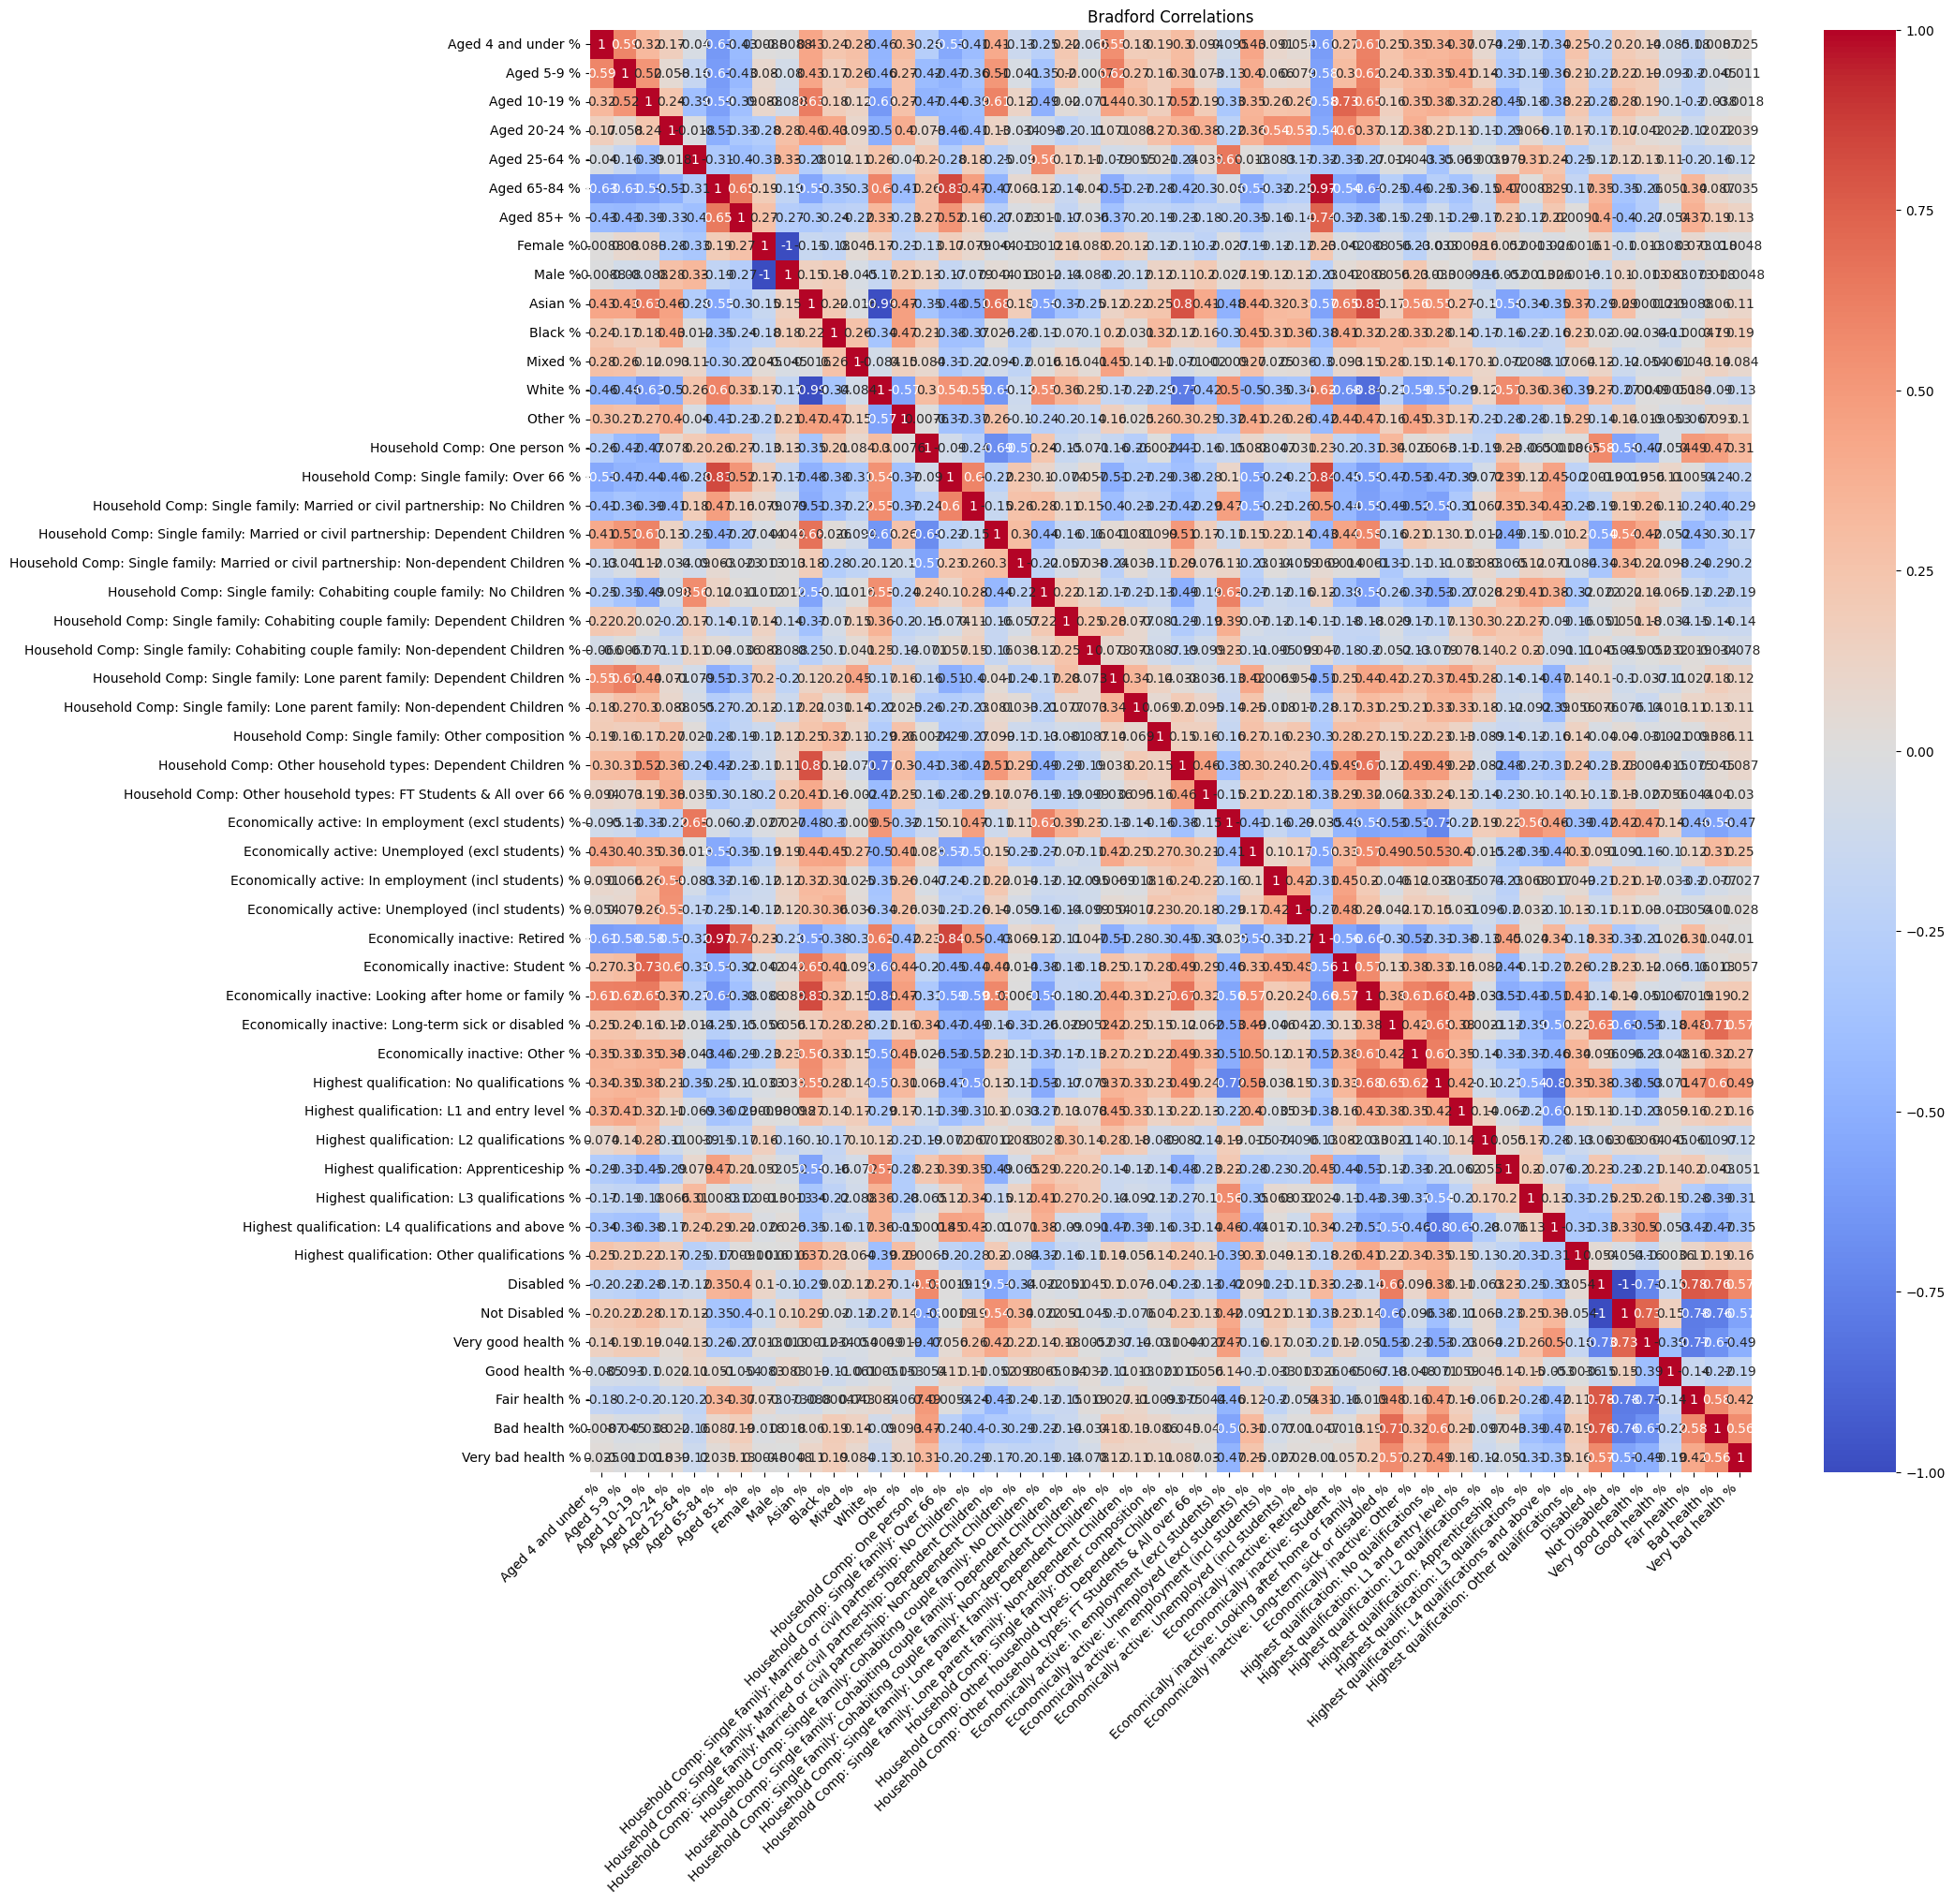

In [71]:
#Plotting correlation heatmap
fig,ax = plt.subplots(figsize = (20,20))
sns.heatmap(Bradford_corr.corr(numeric_only = True), annot = True, ax = ax, cmap = 'coolwarm')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title('Bradford Correlations')
plt.show()

In [72]:
Liverpool_corr = Liverpool_zscores.copy()
Liverpool_corr = Liverpool_corr.drop(columns=['OA21CD'])

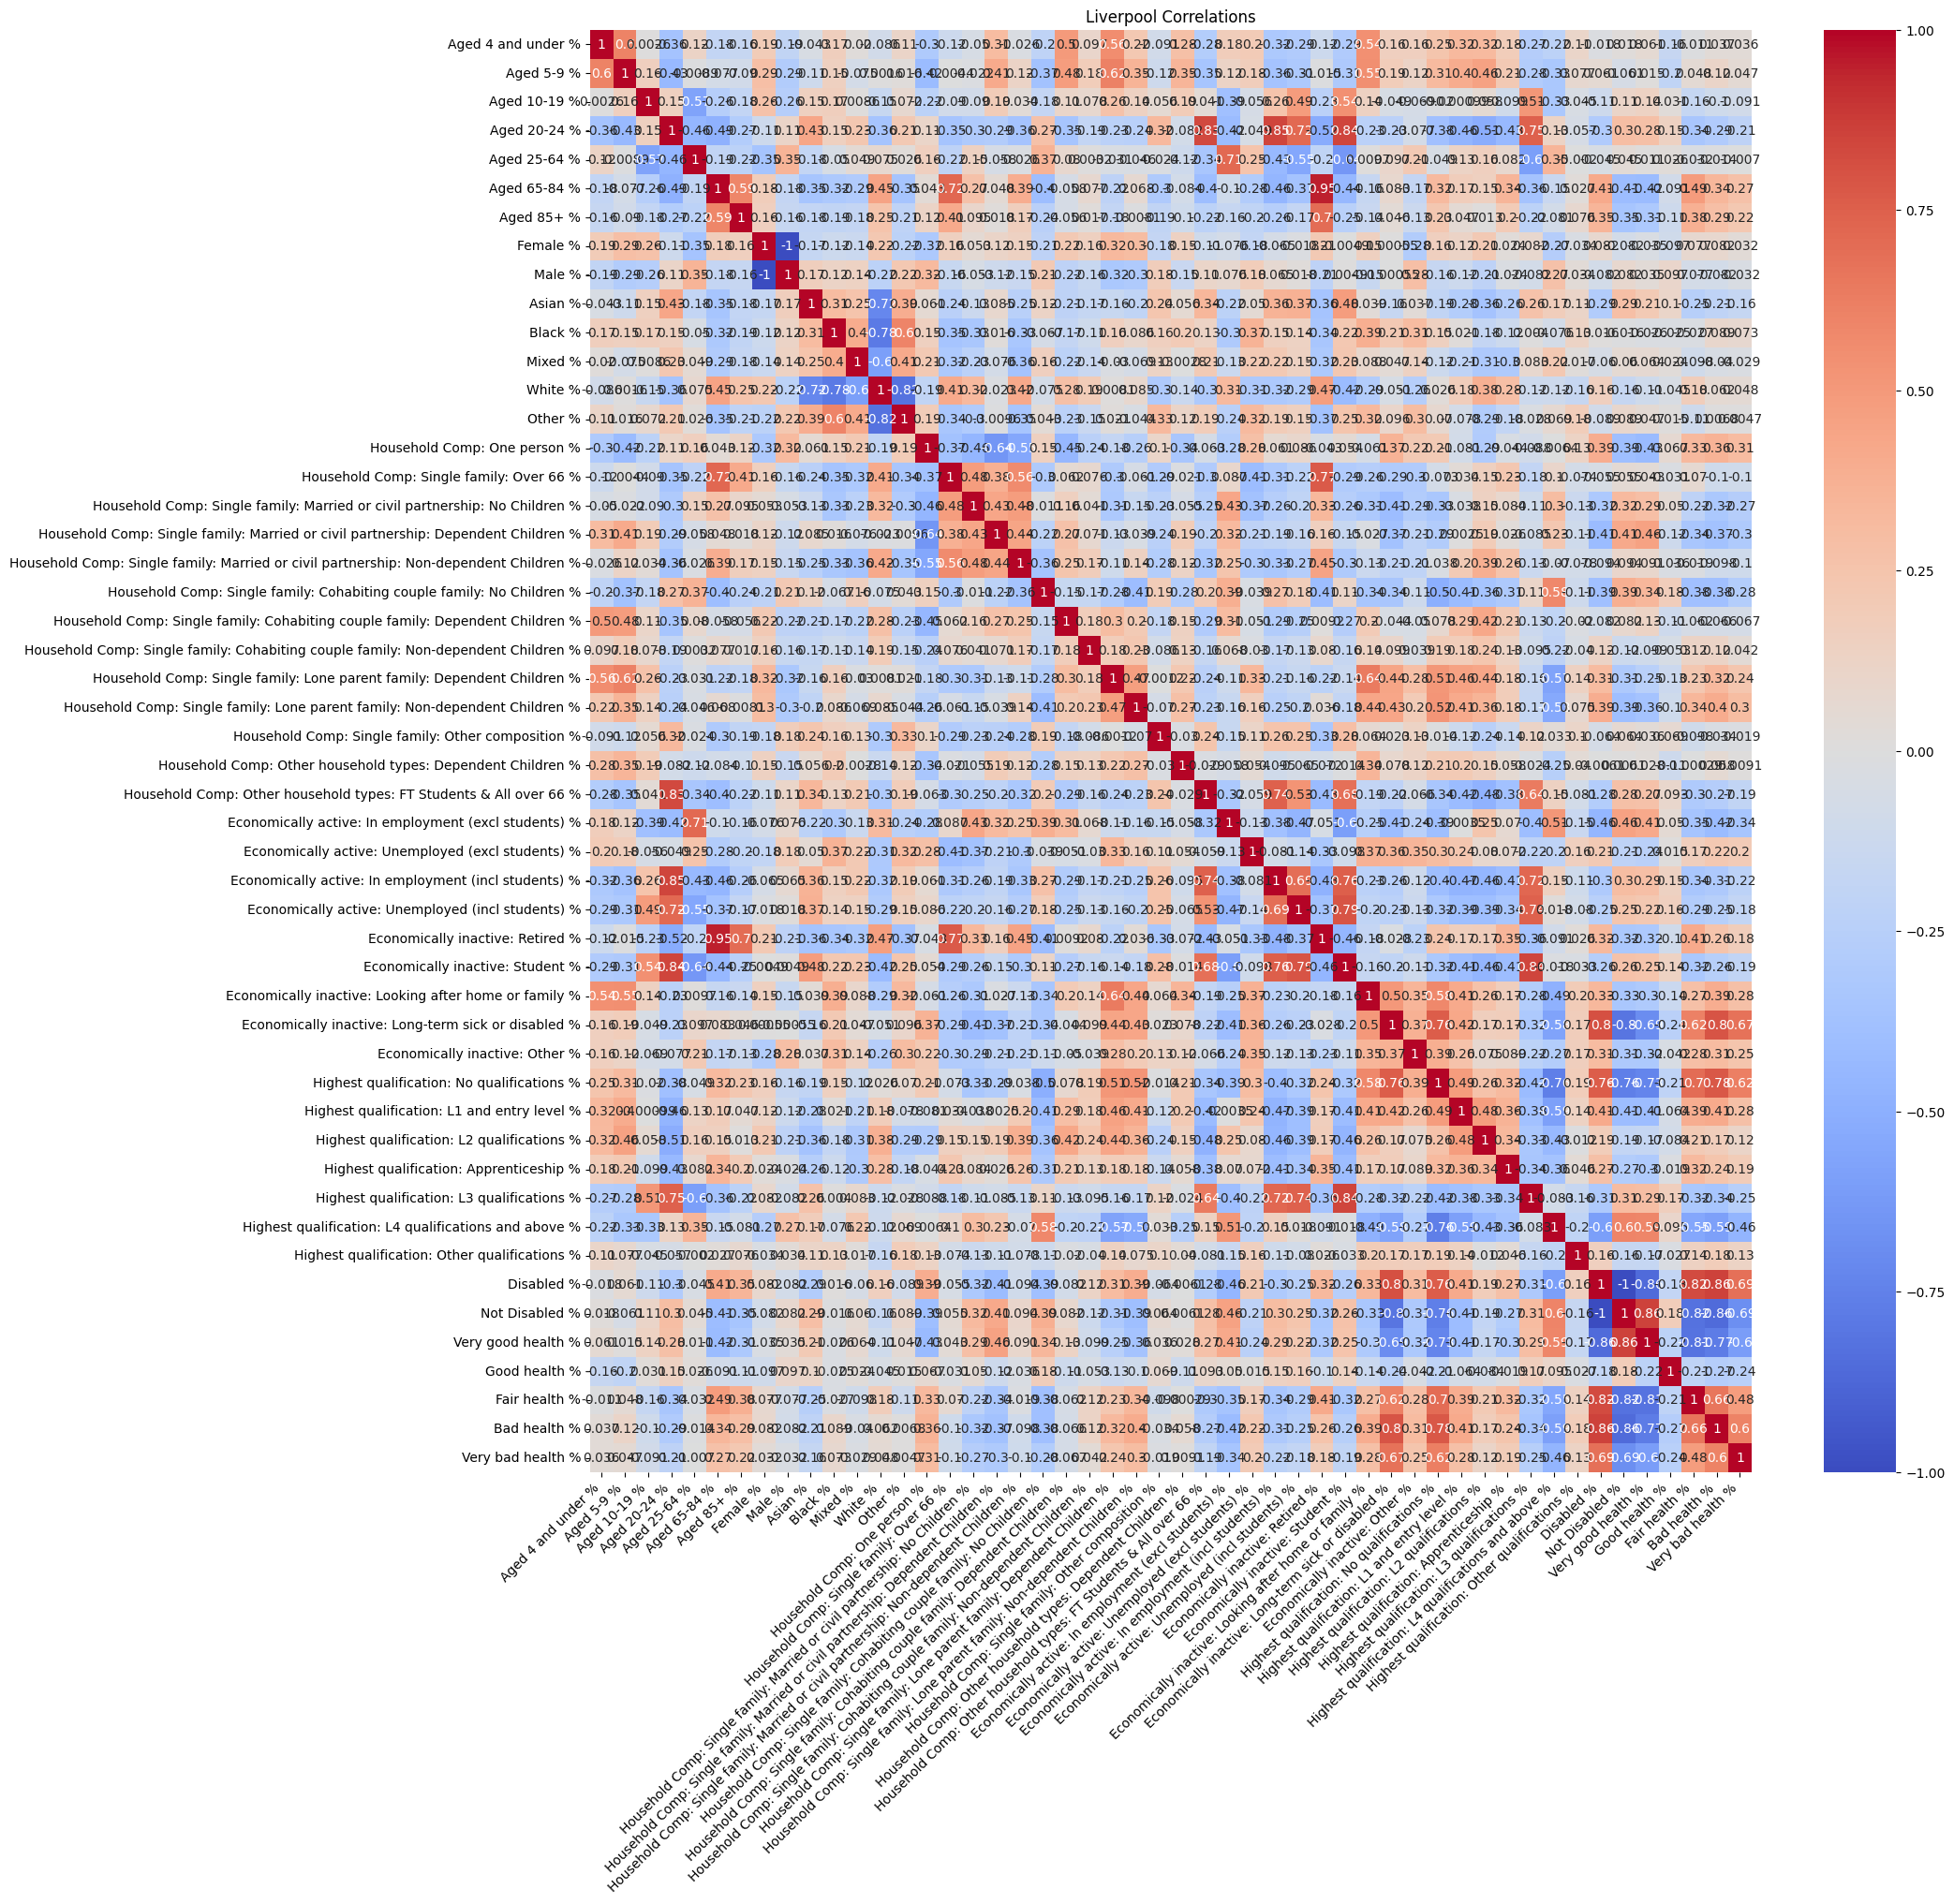

In [73]:
#Plotting correlation heatmap
fig,ax = plt.subplots(figsize = (20,20))
sns.heatmap(Liverpool_corr.corr(numeric_only = True), annot = True, ax = ax, cmap = 'coolwarm')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title('Liverpool Correlations')
plt.show()

In [74]:
#Dropping the highly correlated variables
Bradford_zscores = Bradford_zscores.drop(columns=['OA21CD', 'Aged 85+ %', 'Male %', 'Disabled %'])
Liverpool_zscores = Liverpool_zscores.drop(columns=['OA21CD', 'Aged 85+ %', 'Male %', 'Disabled %'])

Bradford K-means

In [75]:
#Building k-means model for Bradford
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Bradford_zscores)
    distortions.append(kmeanModel.inertia_)


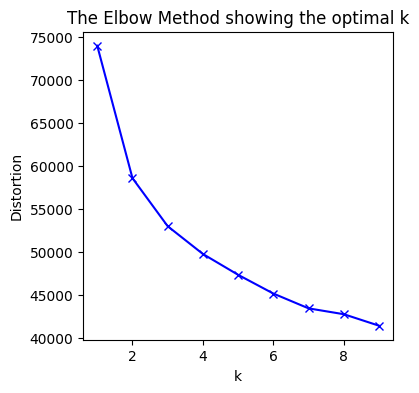

In [76]:
#Viewing elbow method of optimal number of clusters
plt.figure(figsize=(4,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [77]:
#Fitting model
kmeans = KMeans(n_clusters=4)

kmeans.fit(Bradford_zscores)

kmeans.labels_

kmeans_labels = kmeans.labels_

In [78]:
#Calculating silhouette score
metrics.silhouette_score(Bradford_zscores, kmeans_labels)

np.float64(0.1244007821324138)

In [79]:
Bradford_zscores['KClusters'] = kmeans_labels
Bradford_zscores.head()

Aged 4 and under %  Aged 5-9 %  Aged 10-19 %  Aged 20-24 %  Aged 25-64 %  \
0           -0.534096   -2.193852     -1.491326     -1.163540      1.694436   
1           -0.177711    0.495206     -0.412181     -0.890320      0.114669   
2            0.073677   -0.971727     -1.112348     -0.163538      0.464176   
3            1.594222   -0.290524     -0.956804      0.000394     -0.074583   
4           -1.160995   -0.463593     -0.200716     -0.479158     -0.217998   

   Aged 65-84 %  Female %   Asian %   Black %   Mixed %  ...  \
0      1.091612 -0.900300 -0.830045 -0.666281 -1.219941  ...   
1      0.459745  0.181999 -0.875643 -0.562846 -0.736984  ...   
2      0.752396 -0.022528 -0.713644 -0.118980 -0.702340  ...   
3      0.055024 -0.258073 -0.905926 -0.450158 -1.021046  ...   
4      0.836671  0.681954 -0.788039 -0.565617 -1.331708  ...   

   Highest qualification: L3 qualifications %  \
0                                    0.102759   
1                                    1.496259   
2                                   -0.463467   
3                                    2.011165   
4                                    0.357437   

   Highest qualification: L4 qualifications and above %  \
0                                           0.141559      
1                                           0.339658      
2                                           1.893398      
3                                           0.086335      
4                                           1.045320      

   Highest qualification: Other qualifications %  Not Disabled %  \
0                                       0.100155       -0.581169   
1                                      -1.060538        0.704353   
2                                      -0.825810        0.934909   
3                                       0.023935       -0.109926   
4                                       0.182139        0.964917   

   Very good health %  Good health %  Fair health %  Bad health %  \
0           -0.691152      -0.360940       1.551464     -0.038349   
1            0.624559       0.213991      -1.012496     -0.374875   
2            1.676308      -0.416240      -1.339056     -1.244599   
3            0.275708       0.307759      -0.773891     -0.090697   
4            1.114176       0.385020      -1.435294     -1.067900   

   Very bad health %  KClusters  
0           0.164677          0  
1          -0.177592          0  
2          -1.272853          0  
3           0.148379          1  
4          -0.741472          0  

[5 rows x 48 columns]

In [80]:
Bradford_zscores['KClusters'].value_counts()

KClusters
1    529
2    421
0    368
3    257
Name: count, dtype: int64

In [81]:
pd.set_option('display.max_columns', None)

In [82]:
#Viewing average values for each cluster and variable
Bradford_clusters_averages = Bradford_zscores.groupby('KClusters').mean()
Bradford_clusters_averages

Aged 4 and under %  Aged 5-9 %  Aged 10-19 %  Aged 20-24 %  \
KClusters                                                               
0                   -0.856809   -0.747385     -0.679343     -0.648264   
1                    0.025130   -0.057702     -0.280932     -0.095515   
2                    0.653034    0.687387      1.023040      0.764556   
3                    0.105388    0.062925     -0.124858     -0.127585   

           Aged 25-64 %  Aged 65-84 %  Female %   Asian %   Black %   Mixed %  \
KClusters                                                                       
0             -0.361480      1.224864  0.187533 -0.710524 -0.510308 -0.592944   
1              0.681497     -0.211216 -0.038185 -0.461149 -0.197593  0.159039   
2             -0.487875     -0.868029 -0.214565  1.414019  0.447572 -0.060112   
3             -0.085961      0.102816  0.161555 -0.349734  0.404249  0.620152   

            White %   Other %  Household Comp: One person %  \
KClusters                                                     
0          0.786713 -0.519470                     -0.105889   
1          0.458062 -0.261705                      0.056328   
2         -1.419114  0.826517                     -0.567565   
3          0.255338 -0.071427                      0.965427   

           Household Comp: Single family: Over 66 %  \
KClusters                                             
0                                          1.420631   
1                                         -0.183247   
2                                         -0.737262   
3                                         -0.449289   

           Household Comp: Single family: Married or civil partnership: No Children %  \
KClusters                                                                               
0                                                   1.022426                            
1                                                   0.211138                            
2                                                  -0.787260                            
3                                                  -0.608983                            

           Household Comp: Single family: Married or civil partnership: Dependent Children %  \
KClusters                                                                                      
0                                                  -0.249309                                   
1                                                  -0.253148                                   
2                                                   1.032223                                   
3                                                  -0.812859                                   

           Household Comp: Single family: Married or civil partnership: Non-dependent Children %  \
KClusters                                                                                          
0                                                   0.347399                                       
1                                                  -0.082379                                       
2                                                   0.232172                                       
3                                                  -0.708206                                       

           Household Comp: Single family: Cohabiting couple family: No Children %  \
KClusters                                                                           
0                                                   0.119101                        
1                                                   0.705275                        
2                                                  -0.841004                        
3                                                  -0.244579                        

           Household Comp: Single family: Cohabiting couple family: Dependent Children %  \
KClusters                                                  

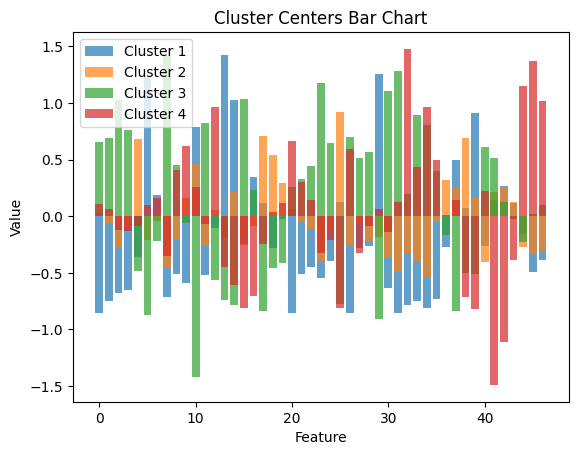

In [83]:
#Viewing cluster centres
cluster_centers = kmeans.cluster_centers_

plt.bar(range(len(cluster_centers[0])), cluster_centers[0], label=f'Cluster 1', alpha=0.7)
plt.bar(range(len(cluster_centers[1])), cluster_centers[1], label=f'Cluster 2', alpha=0.7)
plt.bar(range(len(cluster_centers[2])), cluster_centers[2], label=f'Cluster 3', alpha=0.7)
plt.bar(range(len(cluster_centers[3])), cluster_centers[3], label=f'Cluster 4', alpha=0.7)

plt.title('Cluster Centers Bar Chart')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.legend()
plt.show()

In [84]:
Bradfordready['clusters'] = Bradford_zscores['KClusters']

In [ ]:
#Creating an interactive map to view the cluster results
Bradfordready.explore('clusters', categorical=True)


In [86]:
Bradfordready['clusters'] = Bradfordready['clusters'].astype(str)

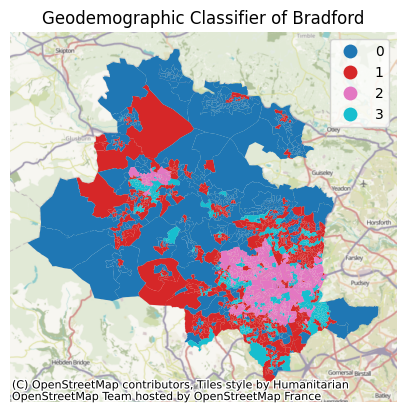

In [87]:
#Map to include in presentation
fig, ax = plt.subplots(1)
Bradfordready.plot(ax = ax,column = 'clusters', legend = True)
plt.title('Geodemographic Classifier of Bradford')
ax.set_axis_off()
cx.add_basemap(ax, crs = 'EPSG:27700')
plt.show()

Liverpool K-means

In [88]:
#Building k-means model for Liverpool
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Liverpool_zscores)
    distortions.append(kmeanModel.inertia_)

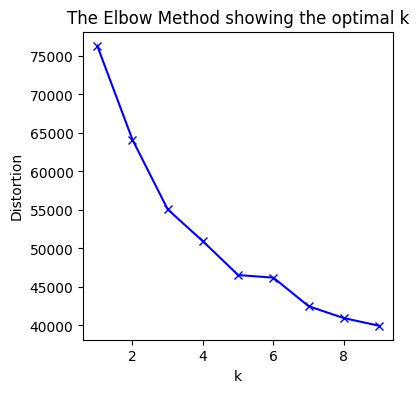

In [89]:
#Viewing elbow plot of optimal number of clusters
plt.figure(figsize=(4,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [90]:
kmeans = KMeans(n_clusters=4)

kmeans.fit(Liverpool_zscores)

kmeans.labels_

kmeans_labels = kmeans.labels_

In [91]:
#Calculating silhouette score
metrics.silhouette_score(Liverpool_zscores, kmeans_labels)

np.float64(0.15930608232276586)

In [92]:
Liverpool_zscores['KClusters'] = kmeans_labels
Liverpool_zscores.head()

Aged 4 and under %  Aged 5-9 %  Aged 10-19 %  Aged 20-24 %  Aged 25-64 %  \
0           -0.625926   -0.634267     -0.298324      0.640725      0.141939   
1           -1.528204   -1.970768     -1.216299      1.210951     -0.017190   
2           -1.486040   -1.275800     -1.020257     -0.295315      2.583664   
3           -1.655434   -2.076640     -1.637492      0.649565      1.697083   
4           -1.391494   -1.809561     -1.349266      1.174324      1.516906   

   Aged 65-84 %  Female %   Asian %   Black %   Mixed %   White %   Other %  \
0     -0.376398 -0.262324  0.796036 -0.116087  2.136169 -1.375538  1.813264   
1      0.699091 -1.519351 -0.437137 -0.339498  1.151872  0.288006 -0.597302   
2     -0.909578 -2.385721  0.092648  0.828937  1.749961 -0.834505  0.409884   
3     -0.349529 -1.941077  1.177258  0.454048 -0.000637 -0.728697  0.192528   
4     -1.114943 -0.537488 -0.493693  1.389073  6.071438 -1.454119 -0.156641   

   Household Comp: One person %  Household Comp: Single family: Over 66 %  \
0                     -0.129408                                  0.066825   
1                      2.004151                                 -1.045865   
2                      1.893811                                 -1.066488   
3                      2.369917                                 -1.162551   
4                      1.954380                                 -1.162551   

   Household Comp: Single family: Married or civil partnership: No Children %  \
0                                          -1.193062                            
1                                          -0.180641                            
2                                          -1.084856                            
3                                          -0.949860                            
4                                          -0.987886                            

   Household Comp: Single family: Married or civil partnership: Dependent Children %  \
0                                          -0.658768                                   
1                                          -1.142578                                   
2                                          -1.219813                                   
3                                          -1.506598                                   
4                                          -1.253895                                   

   Household Comp: Single family: Married or civil partnership: Non-dependent Children %  \
0                                          -0.474506                                       
1                                          -1.218205                                       
2                                          -1.242905                                       
3                                          -1.124595                                       
4                                          -1.097574                                       

   Household Comp: Single family: Cohabiting couple family: No Children %  \
0                                          -0.533293                        
1                                           0.002221                        
2                                           0.721995                        
3                                           1.801203                        
4                                           2.048663                        

   Household Comp: Single family: Cohabiting couple family: Dependent Children %  \
0                                           0.618579                               
1                                          -0.701585                               
2                                          -1.176972                               
3                                          -1.172265                               
4                                          -1.509554                               

   Household Comp: Single family: Cohabiting couple f

In [93]:
Liverpool_zscores['KClusters'].value_counts()

KClusters
0    682
3    587
1    217
2    138
Name: count, dtype: int64

In [94]:
#Viewing average values for each cluster and variable (Liverpool)
Liverpool_clusters_averages = Liverpool_zscores.groupby('KClusters').mean()
Liverpool_clusters_averages

Aged 4 and under %  Aged 5-9 %  Aged 10-19 %  Aged 20-24 %  \
KClusters                                                               
0                    0.187681    0.296892      0.017724     -0.322238   
1                    0.401163    0.151334      0.059656      0.167547   
2                   -1.248898   -1.413675      0.699023      2.847505   
3                   -0.072747   -0.068539     -0.206982     -0.356980   

           Aged 25-64 %  Aged 65-84 %  Female %   Asian %   Black %   Mixed %  \
KClusters                                                                       
0             -0.049480      0.253018  0.301226 -0.377225 -0.141869 -0.287907   
1              0.386605     -0.802435 -0.738811  0.834555  1.505725  1.126644   
2             -1.435825     -1.328585 -0.197204  1.246711  0.140946  0.488473   
3              0.252122      0.315017 -0.030494 -0.163334 -0.424937 -0.196829   

            White %   Other %  Household Comp: One person %  \
KClusters                                                     
0          0.363609 -0.266341                      0.168340   
1         -1.691053  1.600890                      0.558712   
2         -0.836483  0.448085                      0.276864   
3          0.399338 -0.387707                     -0.467216   

           Household Comp: Single family: Over 66 %  \
KClusters                                             
0                                         -0.130749   
1                                         -0.793799   
2                                         -0.841634   
3                                          0.643221   

           Household Comp: Single family: Married or civil partnership: No Children %  \
KClusters                                                                               
0                                                  -0.343406                            
1                                                  -0.670861                            
2                                                  -0.659515                            
3                                                   0.802032                            

           Household Comp: Single family: Married or civil partnership: Dependent Children %  \
KClusters                                                                                      
0                                                  -0.400230                                   
1                                                  -0.082009                                   
2                                                  -0.768867                                   
3                                                   0.676076                                   

           Household Comp: Single family: Married or civil partnership: Non-dependent Children %  \
KClusters                                                                                          
0                                                  -0.021976                                       
1                                                  -0.769813                                       
2                                                  -1.019853                                       
3                                                   0.549875                                       

           Household Comp: Single family: Cohabiting couple family: No Children %  \
KClusters                                                                           
0                                                  -0.397052                        
1                                                   0.016466                        
2                                                   1.015257                        
3                                                   0.216544                        

           Household Comp: Single family: Cohabiting couple family: Dependent Children %  \
KClusters                                                  

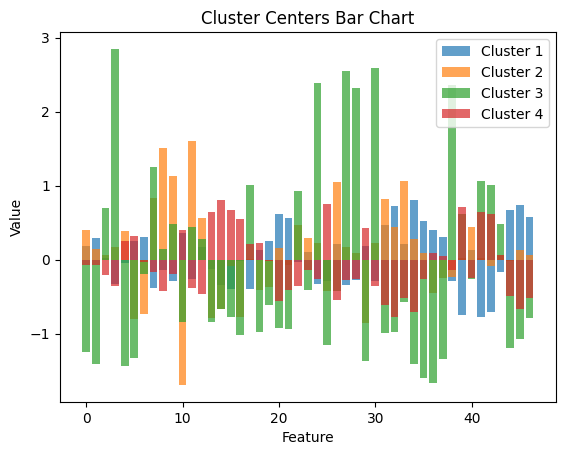

In [95]:
#Viewing cluster centres
cluster_centers = kmeans.cluster_centers_

plt.bar(range(len(cluster_centers[0])), cluster_centers[0], label=f'Cluster 1', alpha=0.7)
plt.bar(range(len(cluster_centers[1])), cluster_centers[1], label=f'Cluster 2', alpha=0.7)
plt.bar(range(len(cluster_centers[2])), cluster_centers[2], label=f'Cluster 3', alpha=0.7)
plt.bar(range(len(cluster_centers[3])), cluster_centers[3], label=f'Cluster 4', alpha=0.7)

plt.title('Cluster Centers Bar Chart')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.legend()
plt.show()

In [96]:
Liverpoolready['clusters'] = Liverpool_zscores['KClusters']

In [ ]:
#Creating an interactive map to view the cluster results
Liverpoolready.explore('clusters', categorical=True)

In [98]:
Liverpoolready['clusters'] = Liverpoolready['clusters'].astype(str)

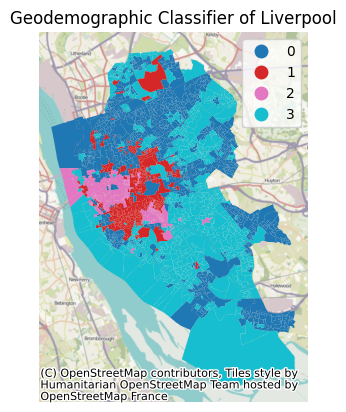

In [99]:
#Map to include in presentation
fig, ax = plt.subplots(1)
Liverpoolready.plot(ax = ax,column = 'clusters', legend = True)
plt.title('Geodemographic Classifier of Liverpool')
ax.set_axis_off()
cx.add_basemap(ax, crs = 'EPSG:27700')
plt.show()

Case Studies

In [100]:
#Highstreet case studies based on chosen postcode
BradfordHS = gpd.read_file('/Users/emilyrumer/Documents/UNI/YEAR 4/GEOG5303M Creative Coding/3 Healthy High Streets/Geodemographic Classifier/group stuff/Bradford High Streets/Bradford_High_Streets.shp')
LiverpoolHS = gpd.read_file('/Users/emilyrumer/Documents/UNI/YEAR 4/GEOG5303M Creative Coding/3 Healthy High Streets/Geodemographic Classifier/group stuff/LiverPool High Streets/LiverPool_High_Streets.shp')

In [101]:
BradfordCaseStudy = BradfordHS[BradfordHS["RoadName"].str.contains("GREAT HORTON ROAD", na=False)]
BradfordCaseStudy = BradfordHS[BradfordHS["OSODR"].str.contains("O13RMAARCUYAV", na=False)]
BradfordCaseStudy.head()

Code Indicator  Metres Number          OSODR           RoadName    ID  \
10  3004      None     362   None  O13RMAARCUYAV  GREAT HORTON ROAD  2224   

                                             geometry  
10  LINESTRING (414939.004 432275.002, 415225.998 ...

In [102]:
LiverpoolCaseStudy = LiverpoolHS[LiverpoolHS["RoadName"].str.contains("DERBY LANE", na=False)]
LiverpoolCaseStudy.head()

Code Indicator  Metres Number          OSODR    RoadName    ID  \
8  3004      None     318   None  O13TTA5T0WPTV  DERBY LANE  3701   

                                            geometry  
8  LINESTRING (339299.003 391470.002, 339334.003 ...